<a href="https://colab.research.google.com/github/zakwaannn/Startup-Insights-Data-Analytic/blob/main/StartupInsights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TDA3121 Group Assignment/Assignment 40%/CB-Insights_Global-Unicorn-Club_2023.csv')
df.head(10)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,ByteDance,$225.00,7/4/2017,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$137.00,1/12/2012,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$66.00,3/7/2018,Singapore,NaN,Consumer & Retail,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$50.00,23/1/2014,United States,San Francisco,Financial Services,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40.00,8/1/2018,Australia,Surry Hills,Enterprise Tech,"Sequoia Capital China, Blackbird Ventures, Mat..."
5,Revolut,$33.00,26/4/2018,United Kingdom,London,Financial Services,"Index Ventures, DST Global, Ribbit Capital"
6,Epic Games,$31.50,26/10/2018,United States,Cary,Media & Entertainment,"Tencent Holdings, KKR, Smash Ventures"
7,Databricks,$31.00,5/2/2019,United States,San Francisco,Enterprise Tech,"Andreessen Horowitz, New Enterprise Associates..."
8,Fanatics,$31.00,6/6/2012,United States,Jacksonville,Consumer & Retail,"SoftBank Group, Andreessen Horowitz, Temasek H..."
9,OpenAI,$29.00,22/7/2019,United States,San Francisco,Enterprise Tech,Khosla Ventures


In [ ]:
column_name_mapping = {
    'Company': 'Company',
    'Valuation ($B)': 'Valuation',
    'Date Joined': 'JoinDate',
    'Country': 'Country',
    'City': 'City',
    'Industry': 'Industry',
    'Select Investors': 'Investors'
}

df.rename(columns=column_name_mapping, inplace=True)

df['JoinDate'] = pd.to_datetime(df['JoinDate'])
df['Valuation'] = pd.to_numeric(df['Valuation'].str.replace('$', ''), errors='coerce')

<ipython-input-12-8d88bae2e355>:13: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['JoinDate'] = pd.to_datetime(df['JoinDate'])
<ipython-input-12-8d88bae2e355>:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Valuation'] = pd.to_numeric(df['Valuation'].str.replace('$', ''), errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Company    1235 non-null   object        
 1   Valuation  1235 non-null   float64       
 2   JoinDate   1235 non-null   datetime64[ns]
 3   Country    1235 non-null   object        
 4   City       1216 non-null   object        
 5   Industry   1235 non-null   object        
 6   Investors  1233 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 67.7+ KB


In [ ]:
df.describe()

,Valuation
count,1235.000000
mean,3.110040
std,8.412998
min,1.000000
25%,1.070000
50%,1.550000
75%,3.000000
max,225.000000


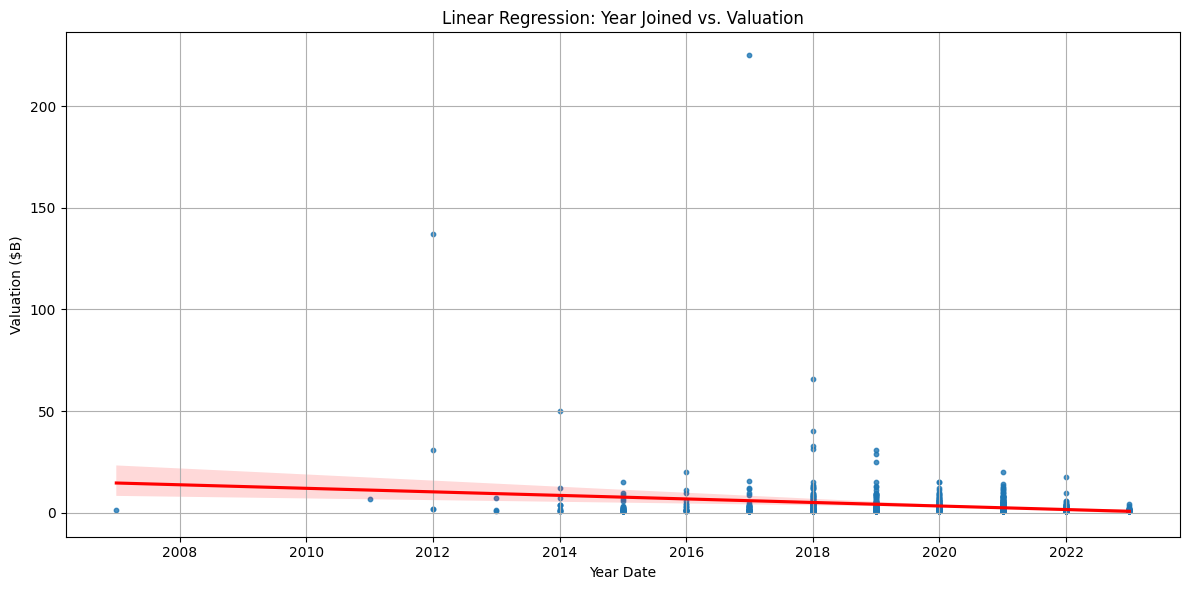

In [ ]:

# Create a scatter plot with a regression line
plt.figure(figsize=(12, 6))
sns.regplot(x='JoinYear', y='Valuation', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Linear Regression: Year Joined vs. Valuation')
plt.xlabel('Year Date')
plt.ylabel('Valuation ($B)')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:

# Define your independent variable (X) and dependent variable (y)
X = df['JoinYear']
y = df['Valuation']

# Add a constant term to the independent variable (intercept)
X = sm.add_constant(X)

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Display the summary statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              Valuation   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     54.49
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           2.86e-13
Time:                        20:41:39   Log-Likelihood:                -4355.5
No. Observations:                1235   AIC:                             8715.
Df Residuals:                    1233   BIC:                             8725.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1760.3879    238.058      7.395      0.0

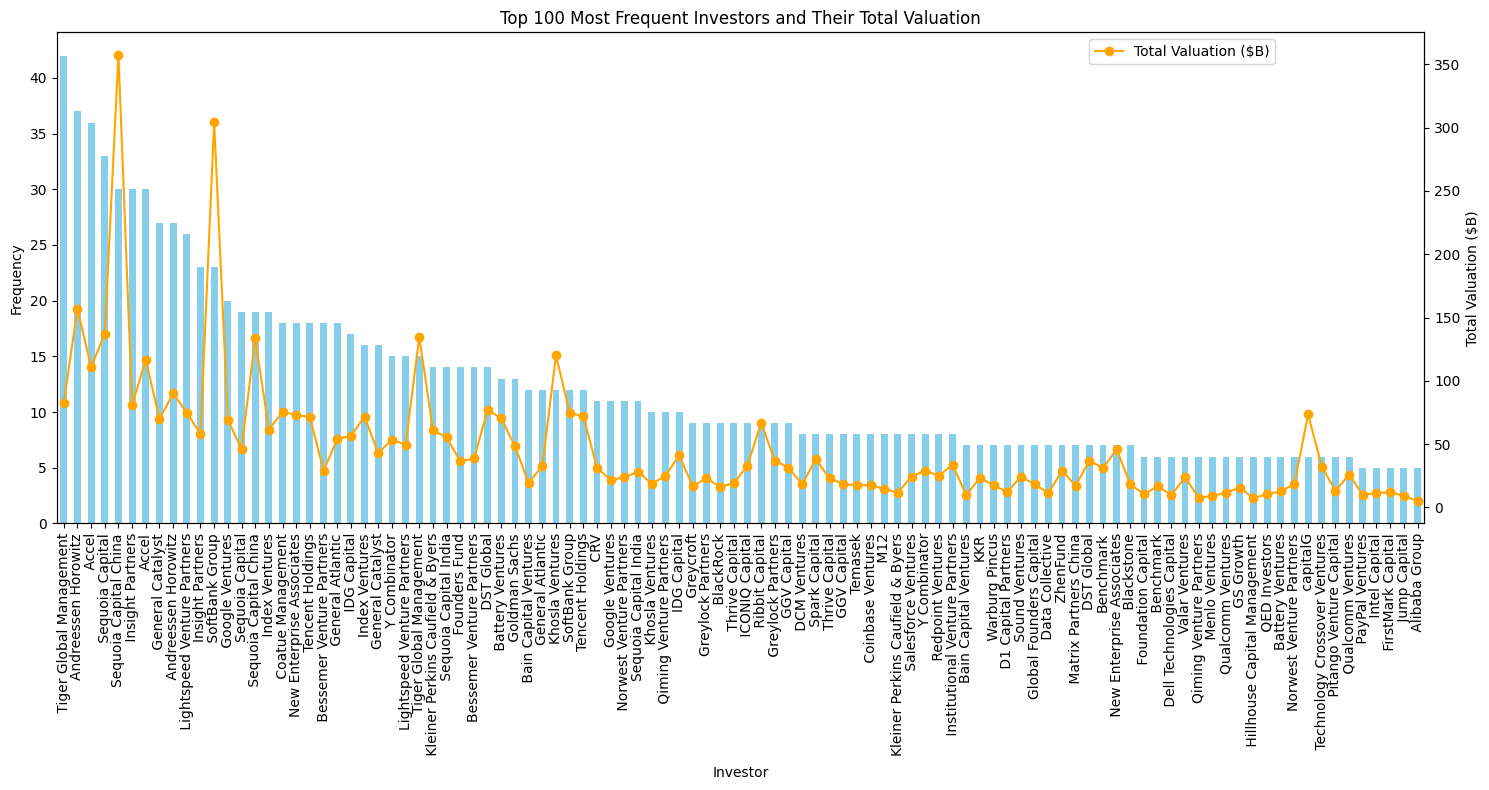

In [ ]:

# Split the 'Select Investors' column by commas into a list of investors
df['Investors List'] = df['Investors'].str.split(',')

# Create a new DataFrame with each investor in a separate row
investor_df = df.explode('Investors List')

# Calculate the total valuation for each investor
investor_valuation = investor_df.groupby('Investors List')['Valuation'].sum()

# Get the top N most frequent investors
top_n_investors = investor_df['Investors List'].value_counts().head(N)

# Create a bar chart to visualize the frequency of top N investors
plt.figure(figsize=(15, 8))
top_n_investors.plot(kind='bar', color='skyblue', label='Frequency')
plt.title('Top {} Most Frequent Investors and Their Total Valuation'.format(N))
plt.xlabel('Investor')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Create a secondary y-axis for total valuation
ax2 = plt.gca().twinx()
investor_valuation.loc[top_n_investors.index].plot(kind='line', marker='o', color='orange', ax=ax2, label='Total Valuation ($B)')
ax2.set_ylabel('Total Valuation ($B)')

# Show legend
plt.legend(loc='upper left', bbox_to_anchor=(0.75, 1))

plt.tight_layout()
plt.show()


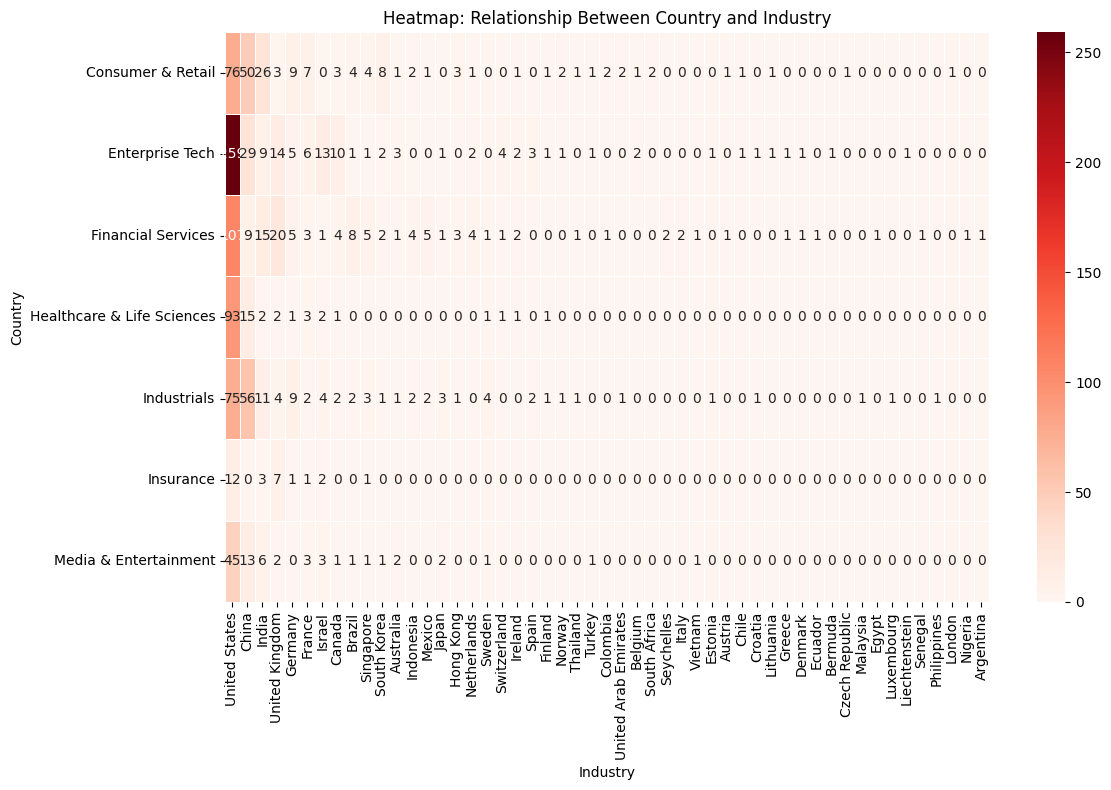

In [ ]:

# Create a pivot table to count the number of startups in each country-industry combination
pivot_table = df.pivot_table(index='Industry', columns='Country', aggfunc='size', fill_value=0)

# Calculate the total number of startups in each industry and sort the columns in descending order
industry_totals = pivot_table.sum().sort_values(ascending=False)
pivot_table = pivot_table[industry_totals.index]

# Create a heatmap with a custom red color map
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='Reds', annot=True, fmt='d', linewidths=.5)
plt.title('Heatmap: Relationship Between Country and Industry')
plt.xlabel('Industry')
plt.ylabel('Country')
plt.tight_layout()

# Display the heatmap
plt.show()


In [ ]:
# Data Preprocessing
df['JoinYear'] = pd.to_datetime(df['JoinDate']).dt.year

# Group data by Year Joined and calculate the total startups for each year
total_startups_by_year = df.groupby('JoinYear')['Company'].count().reset_index()

total_startups_by_year

,JoinYear,Company
0,2007,1
1,2011,1
2,2012,4
3,2013,3
4,2014,12
5,2015,33
6,2016,20
7,2017,42
8,2018,95
9,2019,97


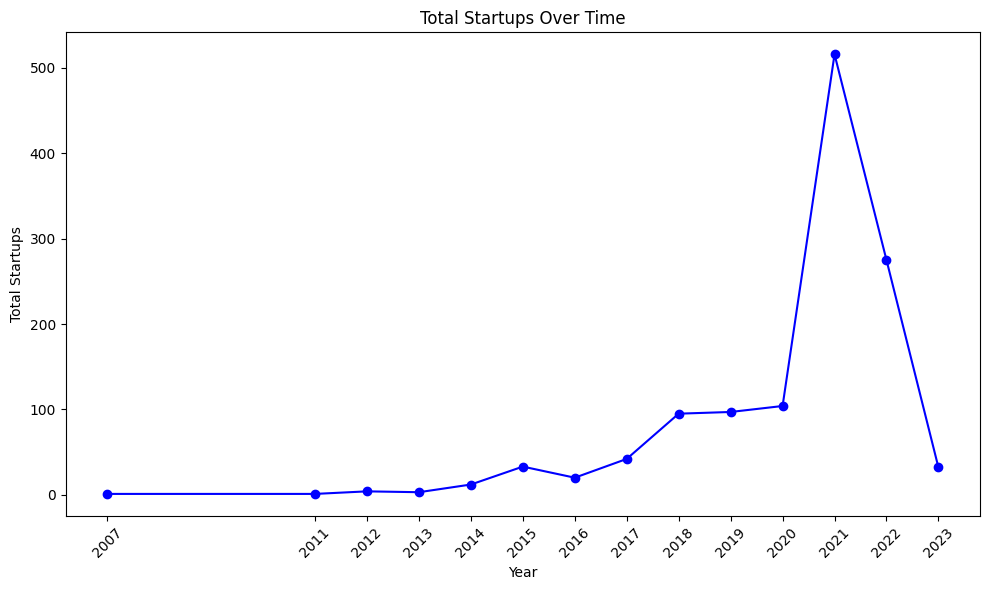

In [ ]:
# Data Preprocessing
df['JoinYear'] = pd.to_datetime(df['JoinDate']).dt.year

# Group data by Year Joined and calculate the total startups for each year
total_startups_by_year = df.groupby('JoinYear')['Company'].count().reset_index()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(total_startups_by_year['JoinYear'], total_startups_by_year['Company'], marker='o', linestyle='-', color='b')
plt.title('Total Startups Over Time')
plt.xlabel('Year')
plt.ylabel('Total Startups')
plt.grid(False)
plt.xticks(total_startups_by_year['JoinYear'], rotation=45)
plt.tight_layout()

# Display the line chart
plt.show()


In [ ]:
df['JoinYear'] = pd.to_datetime(df['JoinDate']).dt.year

# Group data by Year and Industry and calculate the count of startups in each group
industry_trend = df.groupby(['JoinYear', 'Industry']).size().unstack(fill_value=0)

industry_trend

Industry,Consumer & Retail,Enterprise Tech,Financial Services,Healthcare & Life Sciences,Industrials,Insurance,Media & Entertainment
JoinYear,,,,,,,
2007,1,0,0,0,0,0,0
2011,0,0,1,0,0,0,0
2012,2,0,1,0,1,0,0
2013,0,2,0,0,0,0,1
2014,6,2,1,1,1,0,1
2015,15,6,2,2,5,0,3
2016,11,2,1,2,2,0,2
2017,11,5,5,3,7,1,10
2018,21,28,10,7,24,1,4


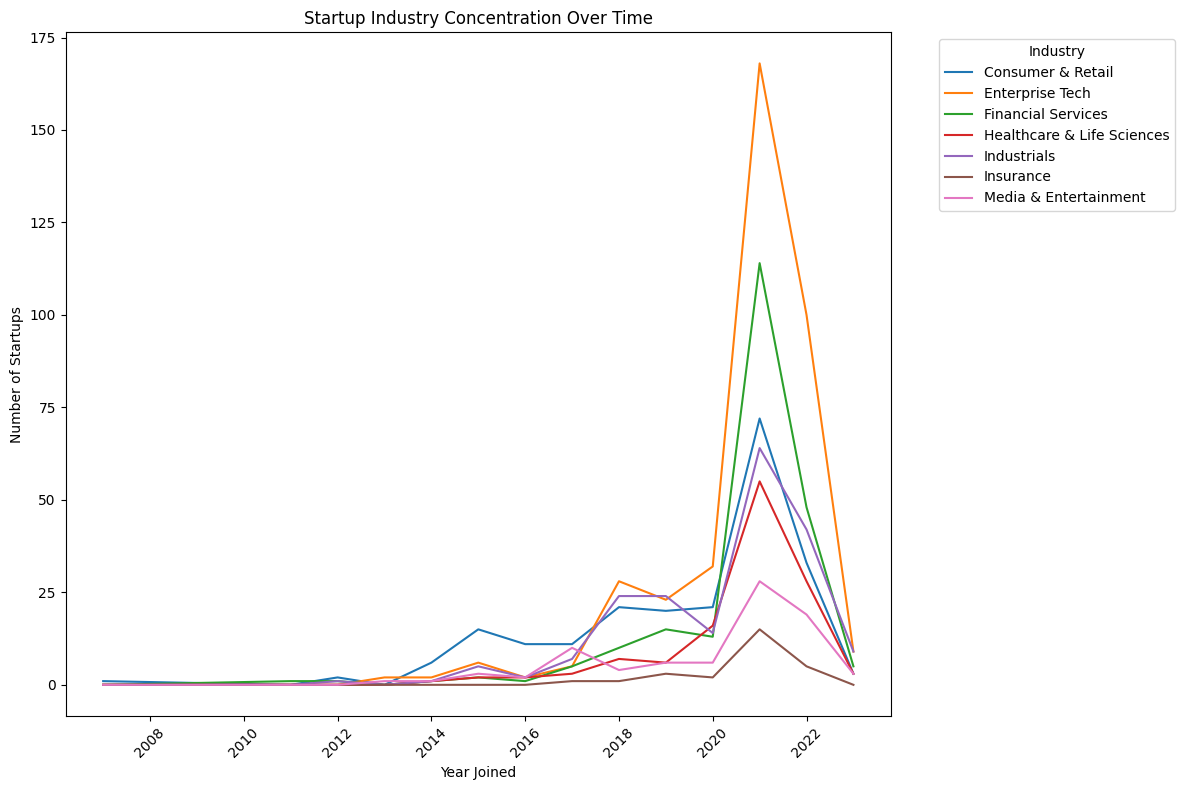

In [ ]:
# Data Preprocessing
df['JoinYear'] = pd.to_datetime(df['JoinDate']).dt.year

# Group data by Year and Industry and calculate the count of startups in each group
industry_trend = df.groupby(['JoinYear', 'Industry']).size().unstack(fill_value=0)

# Create a line plot to visualize industry concentration over time
plt.figure(figsize=(12, 8))
for industry in industry_trend.columns:
    plt.plot(industry_trend.index, industry_trend[industry], label=industry)

plt.title('Startup Industry Concentration Over Time')
plt.xlabel('Year Joined')
plt.ylabel('Number of Startups')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Sort the DataFrame by Valuation in descending order and select the top N startups
N = 100 # Change this to select a different number of top startups
top_startups = df.sort_values(by='Valuation', ascending=False).head(N)

# Group the top startups by Country and calculate the aggregate valuation
country_aggregate_valuation = top_startups.groupby('Country')['Valuation'].sum().reset_index()

# Sort the DataFrame in descending order by Valuation
country_aggregate_valuation = country_aggregate_valuation.sort_values(by='Valuation', ascending=False)

country_aggregate_valuation

,Country,Valuation
16,United States,843.40
2,China,352.18
15,United Kingdom,94.10
11,Singapore,66.00
6,India,51.50
0,Australia,40.00
4,Germany,30.73
7,Indonesia,20.00
8,Israel,18.00
13,Sweden,15.78


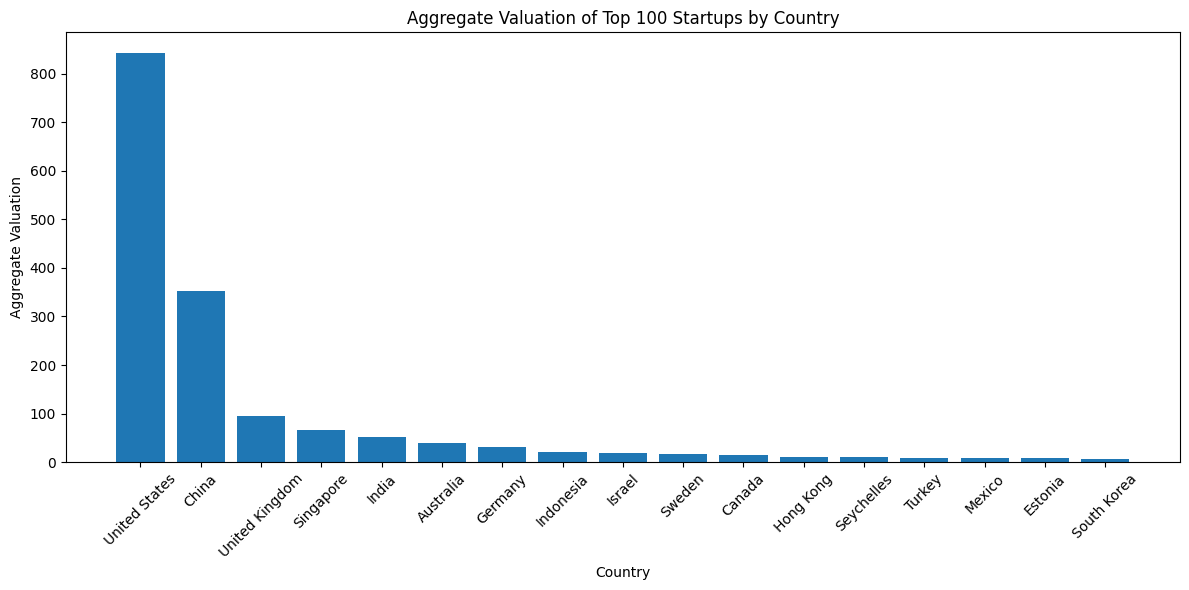

,Company,Valuation,JoinDate,Country,City,Industry,Investors
0,ByteDance,225.0,2017-07-04,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,137.0,2012-01-12,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,66.0,2018-03-07,Singapore,NaN,Consumer & Retail,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,50.0,2014-01-23,United States,San Francisco,Financial Services,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,40.0,2018-08-01,Australia,Surry Hills,Enterprise Tech,"Sequoia Capital China, Blackbird Ventures, Mat..."
...,...,...,...,...,...,...,...
93,Ro,7.0,2020-07-27,United States,New York,Healthcare & Life Sciences,"Initialized Capital, General Catalyst, SignalFire"
94,ConsenSys,7.0,2021-11-17,United States,New York,Enterprise Tech,"Third Point, Electric Capital, Coinbase Ventures"
95,Automation Anywhere,6.8,2018-02-07,United States,San Jose,Enterprise Tech,"General Atlantic, Goldman Sachs, New Enterpris..."
96,1Password,6.8,2021-08-07,Canada,Toronto,Enterprise Tech,"Slack Fund, Accel, Skip Capital"


In [ ]:
# Sort the DataFrame by Valuation in descending order and select the top N startups
N = 100 # Change this to select a different number of top startups
top_startups = df.sort_values(by='Valuation', ascending=False).head(N)

# Group the top startups by Country and calculate the aggregate valuation
country_aggregate_valuation = top_startups.groupby('Country')['Valuation'].sum().reset_index()

# Sort the DataFrame in descending order by Valuation
country_aggregate_valuation = country_aggregate_valuation.sort_values(by='Valuation', ascending=False)

# Create a bar chart to visualize the aggregate valuation by country
plt.figure(figsize=(12, 6))
plt.bar(country_aggregate_valuation['Country'], country_aggregate_valuation['Valuation'])
plt.title('Aggregate Valuation of Top 100 Startups by Country')
plt.xlabel('Country')
plt.ylabel('Aggregate Valuation')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the bar chart
plt.show()

top_startups

In [ ]:
# Group data by Country and calculate the total valuation for each country
total_valuation_by_country = df.groupby('Country')['Valuation'].sum().reset_index()

# Sort the result in descending order of total valuation
total_valuation_by_country = total_valuation_by_country.sort_values(by='Valuation', ascending=False)

# Display the resulting DataFrame
print(total_valuation_by_country)


                 Country  Valuation
49         United States    2063.31
8                  China     641.67
21                 India     195.75
48        United Kingdom     188.67
39             Singapore      88.91
18               Germany      78.98
17                France      59.55
24                Israel      55.42
1              Australia      55.40
6                 Canada      52.23
5                 Brazil      39.08
41           South Korea      32.54
22             Indonesia      30.43
43                Sweden      22.62
33           Netherlands      22.46
20             Hong Kong      20.35
32                Mexico      18.70
46                Turkey      13.55
16               Finland      12.46
44           Switzerland      12.30
38            Seychelles      11.80
3                Belgium      10.08
23               Ireland      10.05
15               Estonia       9.90
26                 Japan       9.82
2                Austria       7.61
9               Colombia    

Number of Unique Industries in Top 30: 6
List of Unique Industries in Top 30:
Enterprise Tech: 10
Financial Services: 10
Media & Entertainment: 3
Consumer & Retail: 3
Industrials: 3
Healthcare & Life Sciences: 1
               Company  Valuation                    Industry  JoinYear  \
0            ByteDance     225.00       Media & Entertainment      2017   
13                Miro      17.50             Enterprise Tech      2022   
2                SHEIN      66.00           Consumer & Retail      2018   
1               SpaceX     137.00                 Industrials      2012   
51              KuCoin      10.00          Financial Services      2022   
12         J&T Express      20.00                 Industrials      2021   
170          Anthropic       4.40             Enterprise Tech      2023   
4                Canva      40.00             Enterprise Tech      2018   
7           Databricks      31.00             Enterprise Tech      2019   
9               OpenAI      29.00     

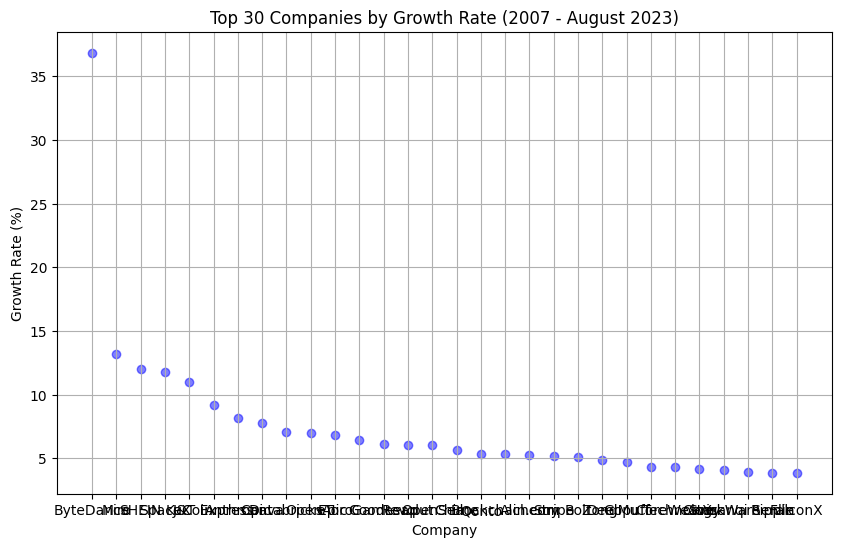

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns: 'JoinDate', 'Valuation', 'Company', 'Industry', 'JoinYear'

# Convert 'JoinDate' to datetime if it's not already in that format
df['JoinDate'] = pd.to_datetime(df['JoinDate'])

# Calculate the number of years from 'JoinDate' to August 2023
august_2023 = pd.to_datetime('2023-08-01')
df['Years in Operation'] = (august_2023 - df['JoinDate']).dt.days / 365.0

# Calculate the growth rate
df['Growth Rate'] = ((df['Valuation'] - df['Valuation'].min()) / df['Valuation'].min()) / df['Years in Operation']

# Sort the DataFrame by growth rate in descending order
df_sorted = df.sort_values(by='Growth Rate', ascending=False)

# Select the top 30 companies with the highest growth rates
top_30_companies = df_sorted.head(30)

# Count the number of occurrences of each unique industry in the top 30 list and list them
industry_counts_top_30 = top_30_companies['Industry'].value_counts()
num_unique_industries_top_30 = len(industry_counts_top_30)
unique_industries_top_30 = industry_counts_top_30.index

# Print the count and list of unique industries in the top 30 list
print(f'Number of Unique Industries in Top 30: {num_unique_industries_top_30}')
print('List of Unique Industries in Top 30:')
for industry in unique_industries_top_30:
    print(f'{industry}: {industry_counts_top_30[industry]}')

# Print the top 10 companies along with their relevant columns including 'Growth Rate'
print(top_30_companies[['Company', 'Valuation', 'Industry', 'JoinYear', 'Growth Rate']])

# Create a scatter plot to visualize the growth rates of the top 10 companies
plt.figure(figsize=(10, 6))
plt.scatter(top_30_companies['Company'], top_30_companies['Growth Rate'], color='b', alpha=0.5)
plt.title('Top 30 Companies by Growth Rate (2007 - August 2023)')
plt.xlabel('Company')
plt.ylabel('Growth Rate (%)')
plt.grid(True)

plt.show()


Number of Unique Industries in Top 30: 6
List of Unique Industries in Top 30:
Enterprise Tech: 10
Financial Services: 10
Media & Entertainment: 3
Consumer & Retail: 3
Industrials: 3
Healthcare & Life Sciences: 1


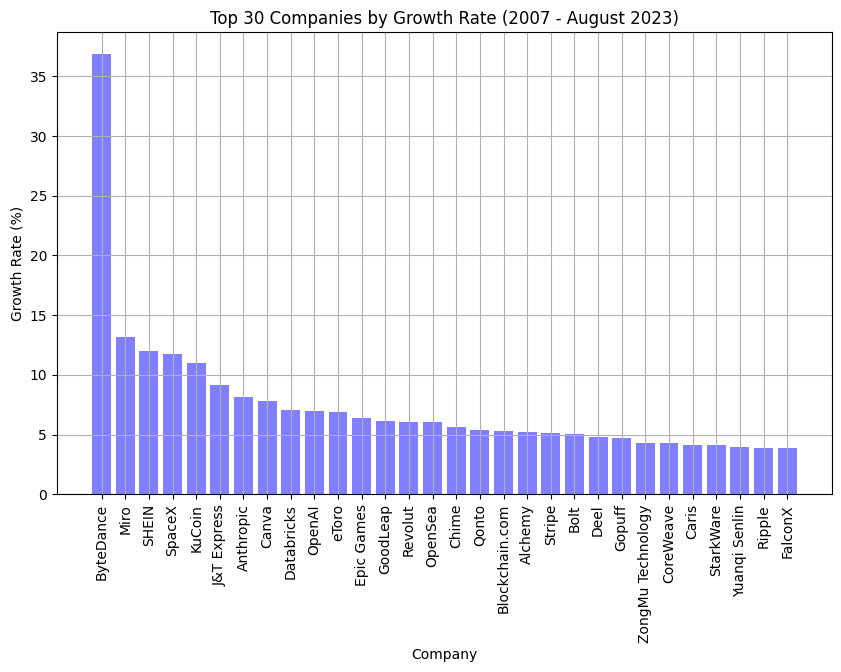

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns: 'JoinDate', 'Valuation', 'Company', 'Industry', 'JoinYear'

# Convert 'JoinDate' to datetime if it's not already in that format
df['JoinDate'] = pd.to_datetime(df['JoinDate'])

# Calculate the number of years from 'JoinDate' to August 2023
august_2023 = pd.to_datetime('2023-08-01')
df['Years in Operation'] = (august_2023 - df['JoinDate']).dt.days / 365.0

# Calculate the growth rate
df['Growth Rate'] = ((df['Valuation'] - df['Valuation'].min()) / df['Valuation'].min()) / df['Years in Operation']

# Sort the DataFrame by growth rate in descending order
df_sorted = df.sort_values(by='Growth Rate', ascending=False)

# Select the top 30 companies with the highest growth rates
top_30_companies = df_sorted.head(30)

# Count the number of occurrences of each unique industry in the top 30 list and list them
industry_counts_top_30 = top_30_companies['Industry'].value_counts()
num_unique_industries_top_30 = len(industry_counts_top_30)
unique_industries_top_30 = industry_counts_top_30.index

# Print the count and list of unique industries in the top 30 list
print(f'Number of Unique Industries in Top 30: {num_unique_industries_top_30}')
print('List of Unique Industries in Top 30:')
for industry in unique_industries_top_30:
    print(f'{industry}: {industry_counts_top_30[industry]}')

# Create a bar chart to visualize the number of occurrences of each unique industry
plt.figure(figsize=(10, 6))
plt.bar(top_30_companies['Company'], top_30_companies['Growth Rate'], color='b', alpha=0.5)
plt.title('Top 30 Companies by Growth Rate (2007 - August 2023)')
plt.xlabel('Company')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=90)
plt.grid(True)

plt.show()


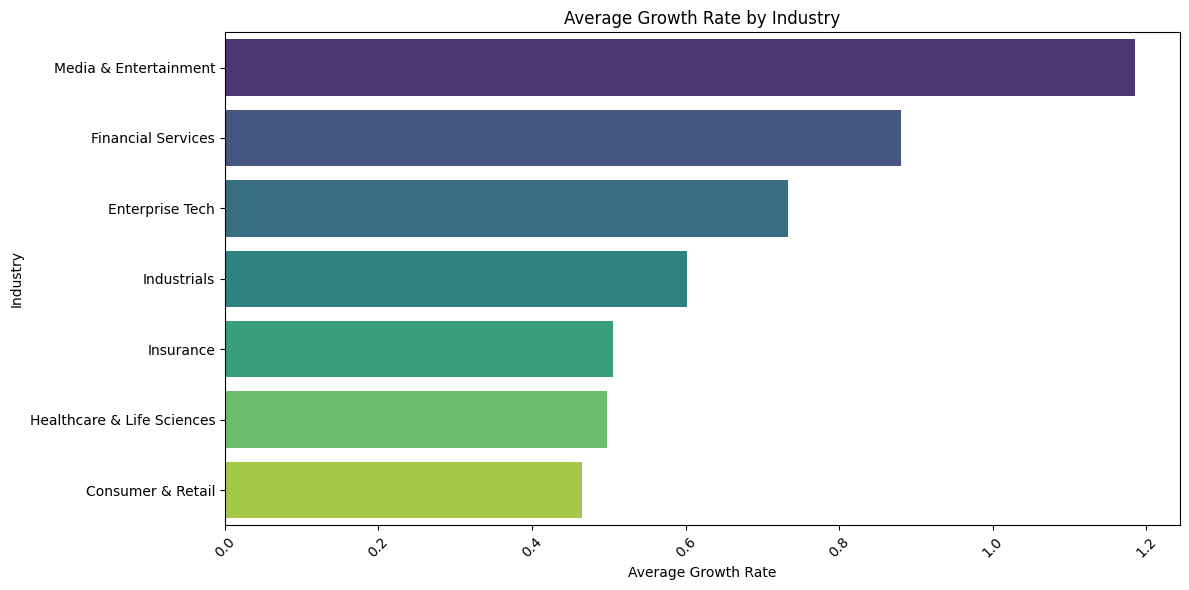

                     Industry  Growth Rate
6       Media & Entertainment     1.184529
2          Financial Services     0.880221
1             Enterprise Tech     0.732892
4                 Industrials     0.602136
5                   Insurance     0.505869
3  Healthcare & Life Sciences     0.498117
0           Consumer & Retail     0.465417


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named df with columns: 'JoinDate', 'Valuation', 'Industry'

# Convert 'JoinDate' to datetime if it's not already in that format
df['JoinDate'] = pd.to_datetime(df['JoinDate'])

# Calculate the number of years from 'JoinDate' to August 2023
august_2023 = pd.to_datetime('2023-08-01')
df['Years in Operation'] = (august_2023 - df['JoinDate']).dt.days / 365.0

# Calculate the growth rate
df['Growth Rate'] = ((df['Valuation'] - df['Valuation'].min()) / df['Valuation'].min()) / df['Years in Operation']

# Group the data by 'Industry' and calculate the average growth rate
average_growth_by_industry = df.groupby('Industry')['Growth Rate'].mean().reset_index()

# Sort the data by average growth rate in descending order
average_growth_by_industry = average_growth_by_industry.sort_values(by='Growth Rate', ascending=False)

# Create a bar chart to visualize the average growth rate by industry
plt.figure(figsize=(12, 6))
sns.barplot(x='Growth Rate', y='Industry', data=average_growth_by_industry, palette='viridis')
plt.title('Average Growth Rate by Industry')
plt.xlabel('Average Growth Rate')
plt.ylabel('Industry')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the DataFrame containing the average growth rate by industry
print(average_growth_by_industry)


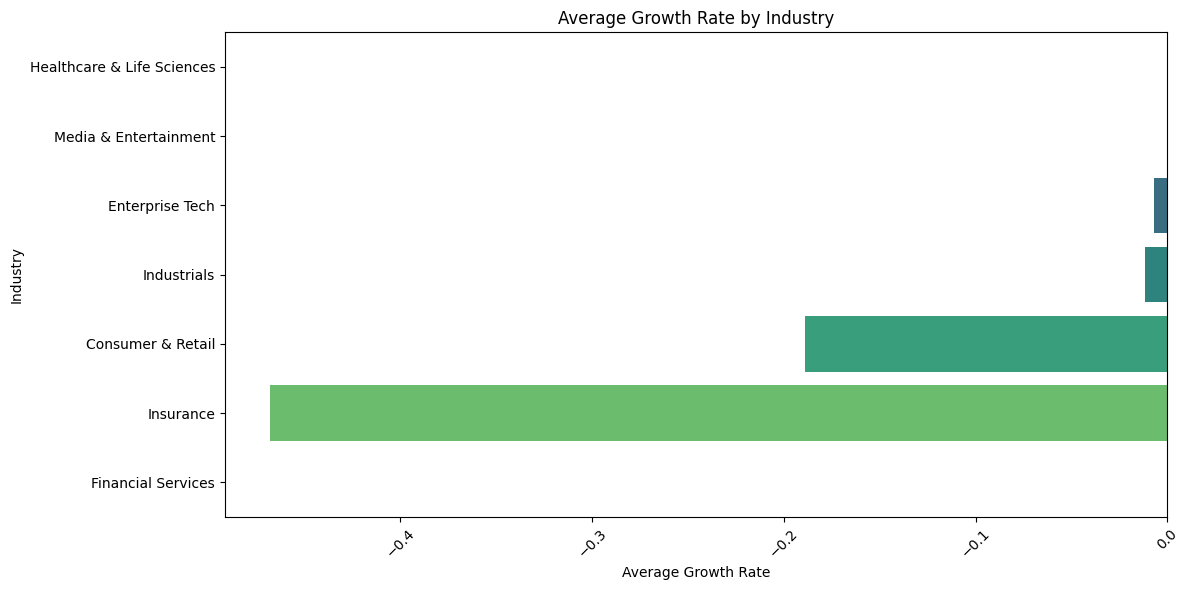

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named df with columns: 'JoinDate', 'Valuation', 'Industry'

# Convert 'JoinDate' to datetime if it's not already in that format
df['JoinDate'] = pd.to_datetime(df['JoinDate'])

# Calculate the number of years from 'JoinDate' to August 2023
august_2023 = pd.to_datetime('2023-08-01')
df['Years in Operation'] = (august_2023 - df['JoinDate']).dt.days / 365.0

# Calculate the growth rate as the annual percentage increase in valuation
df['Growth Rate'] = ((df['Valuation'] - df.groupby('Company')['Valuation'].shift(1)) / df.groupby('Company')['Valuation'].shift(1)) / df['Years in Operation']

# Group the data by 'Industry' and calculate the average growth rate
average_growth_by_industry = df.groupby('Industry')['Growth Rate'].mean().reset_index()

# Sort the data by average growth rate in descending order
average_growth_by_industry = average_growth_by_industry.sort_values(by='Growth Rate', ascending=False)

# Create a bar chart to visualize the average growth rate by industry
plt.figure(figsize=(12, 6))
sns.barplot(x='Growth Rate', y='Industry', data=average_growth_by_industry, palette='viridis')
plt.title('Average Growth Rate by Industry')
plt.xlabel('Average Growth Rate')
plt.ylabel('Industry')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
